In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\omkar\Downloads\spam.csv", encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')

In [4]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [6]:
df.head(10)

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['target'] = encode.fit_transform(df['target'])

## 0 - ham & 1 - spam

In [8]:
df

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

target    0
sms       0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x19137e35550>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

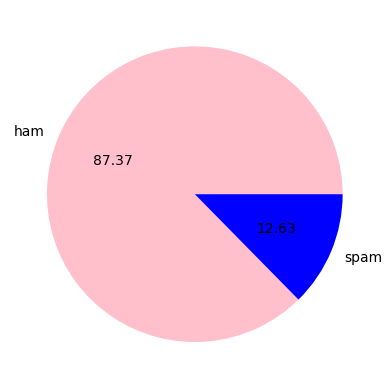

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f",colors=['pink','blue'] )

In [16]:
df['character_counts'] = df['sms'].apply(len)
df

,target,sms,character_counts
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [17]:
df['words'] = df['sms'].apply(lambda x :nltk.word_tokenize(x))
df['words_counts'] = df['sms'].apply(lambda x :len(nltk.word_tokenize(x)))
df

,target,sms,character_counts,words,words_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27


In [18]:
df['sentences']  =df['sms'].apply(lambda x:nltk.sent_tokenize(x))
df['sentences_count']  =df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,target,sms,character_counts,words,words_counts,sentences,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,[This is the 2nd time we have tried 2 contact ...,4
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,[Will Ì_ b going to esplanade fr home?],1
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,"[Pity, * was in mood for that., So...any other...",2
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,[The guy did some bitching but I acted like i'...,1


In [19]:
df.describe()

,target,character_counts,words_counts,sentences_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [20]:
df[df['target']==0][['character_counts','words_counts','sentences_count']].describe()

,character_counts,words_counts,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
df[df['target']==1][['character_counts','words_counts','sentences_count']].describe()

,character_counts,words_counts,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<IPython.core.display.Javascript object>

C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


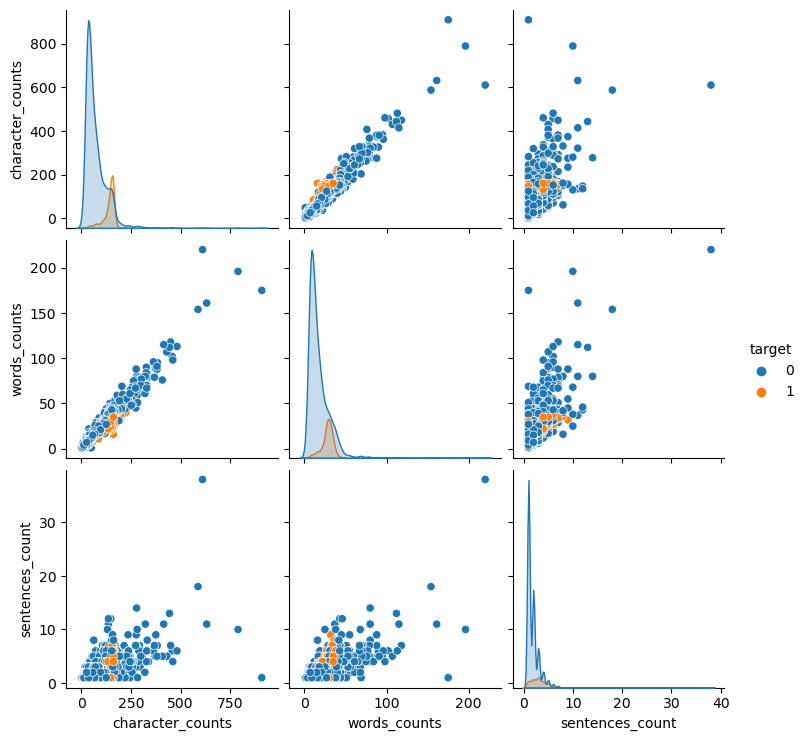

In [22]:
sns.pairplot(df,hue='target')

<IPython.core.display.Javascript object>

<Axes: >

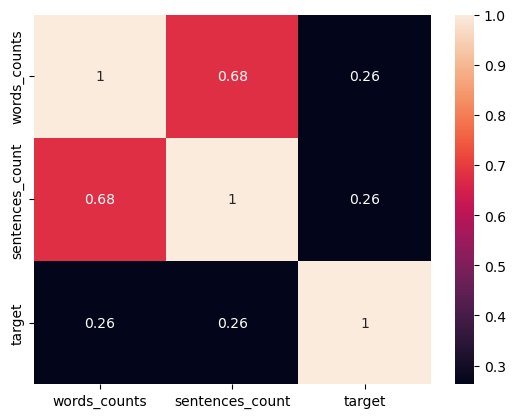

In [23]:
sns.heatmap(df[['words_counts', 'sentences_count', 'target']].corr(), annot=True)

In [24]:
df

,target,sms,character_counts,words,words_counts,sentences,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,[This is the 2nd time we have tried 2 contact ...,4
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,[Will Ì_ b going to esplanade fr home?],1
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,"[Pity, * was in mood for that., So...any other...",2
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,[The guy did some bitching but I acted like i'...,1


In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("playing")

'play'

In [28]:
def text_transformation(sms):
    sms = sms.lower()
    sms = nltk.word_tokenize(sms)
    
    new = []
    for i in sms:
        if i.isalnum():
            new.append(i)
    
    sms = new[:]
    new.clear()
    
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            new.append(i)
        
    sms = new[:]
    new.clear()
    
    for i in sms:
        new.append(ps.stem(i))
    
    return " ".join(new)


In [29]:
df['transformed_text'] = df['sms'].apply(text_transformation)

In [30]:
df

,target,sms,character_counts,words,words_counts,sentences,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1,nah think goe usf live around though
...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,[This is the 2nd time we have tried 2 contact ...,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,[Will Ì_ b going to esplanade fr home?],1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,"[Pity, * was in mood for that., So...any other...",2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,[The guy did some bitching but I acted like i'...,1,guy bitch act like interest buy someth els nex...


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [32]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

<IPython.core.display.Javascript object>

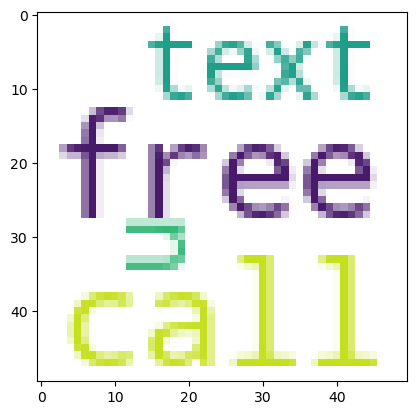

In [33]:
plt.imshow(spam_wc)

In [34]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

<IPython.core.display.Javascript object>

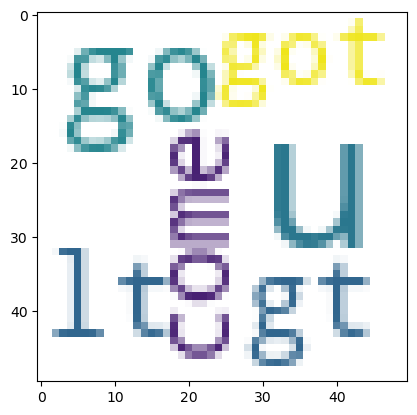

In [35]:
plt.imshow(ham_wc)

In [36]:
df.head()

,target,sms,character_counts,words,words_counts,sentences,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1,nah think goe usf live around though


In [37]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [38]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [39]:
len(ham_corpus)

35404

In [40]:
len(spam_corpus)

9939

In [41]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [42]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

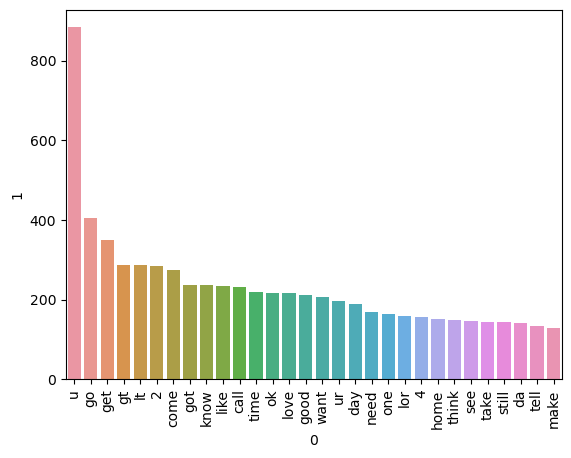

In [43]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

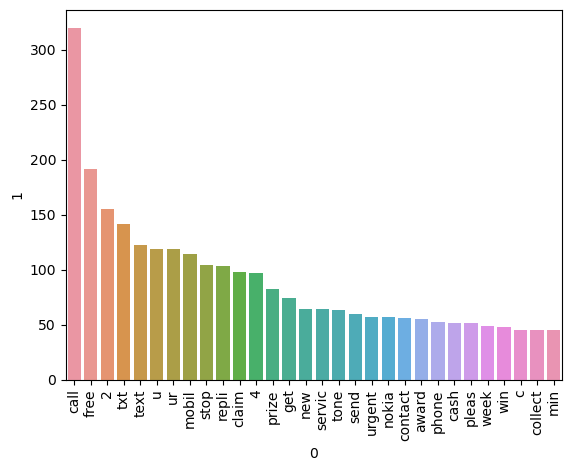

In [44]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")

# Model Building

In [45]:
# bag of words -- Using this now
# TF IDF
# word to ...

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
X.shape

(5169, 6708)

In [49]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
Y=df['target']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()

In [54]:
from sklearn.metrics import accuracy_score, precision_score

In [55]:
gnb.fit(X_train,Y_train)
Y_pred = gnb.predict(X_test)
print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
print("Precision:- ",precision_score(Y_test,Y_pred))

Accuracy:-  0.8481624758220503
Precision:-  0.448


In [56]:
mnb.fit(X_train,Y_train)
Y_pred = mnb.predict(X_test)
print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
print("Precision:- ",precision_score(Y_test,Y_pred))

Accuracy:-  0.9632495164410058
Precision:-  1.0


In [57]:
cnb.fit(X_train,Y_train)
Y_pred = cnb.predict(X_test)
print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
print("Precision:- ",precision_score(Y_test,Y_pred))

Accuracy:-  0.9381044487427466
Precision:-  0.6892655367231638


In [58]:
bnb.fit(X_train,Y_train)
Y_pred = bnb.predict(X_test)
print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
print("Precision:- ",precision_score(Y_test,Y_pred))

Accuracy:-  0.9748549323017408
Precision:-  0.9565217391304348


In [59]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier  # Standard import
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [60]:
log_reg = LogisticRegression()
ridge_clf = RidgeClassifier()
lda = LinearDiscriminantAnalysis()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
et_clf = ExtraTreesClassifier()
gb_clf = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier()
svm_clf = SVC(kernel="rbf")
knn_clf = KNeighborsClassifier(n_neighbors=5)
# bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
adaboost_clf = AdaBoostClassifier(n_estimators=50)
stacking_clf = StackingClassifier(estimators=[("rf", rf_clf), ("xgb", xgb_clf)], final_estimator=LogisticRegression())
voting_clf = VotingClassifier(estimators=[("rf", rf_clf), ("xgb", xgb_clf)], voting='hard')


<IPython.core.display.Javascript object>

In [61]:
# log_reg.fit(X_train,Y_train)
# Y_pred = log_reg.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [62]:
# ridge_clf.fit(X_train,Y_train)
# Y_pred = ridge_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [63]:
# lda.fit(X_train,Y_train)
# Y_pred = lda.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [64]:
# dt_clf.fit(X_train,Y_train)
# Y_pred = dt_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [65]:
# rf_clf.fit(X_train,Y_train)
# Y_pred = rf_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [66]:
# et_clf.fit(X_train,Y_train)
# Y_pred = et_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [67]:
# gb_clf.fit(X_train,Y_train)
# Y_pred = gb_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [68]:
# xgb_clf.fit(X_train,Y_train)
# Y_pred = xgb_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [69]:
svm_clf.fit(X_train,Y_train)
Y_pred = svm_clf.predict(X_test)
print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
print("Precision:- ",precision_score(Y_test,Y_pred))

Accuracy:-  0.9700193423597679
Precision:-  1.0


In [70]:
# knn_clf.fit(X_train,Y_train)
# Y_pred = knn_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [71]:
# adaboost_clf.fit(X_train,Y_train)
# Y_pred = adaboost_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [72]:
# stacking_clf.fit(X_train,Y_train)
# Y_pred = stacking_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [73]:
# voting_clf.fit(X_train,Y_train)
# Y_pred = voting_clf.predict(X_test)
# print("Accuracy:- ",accuracy_score(Y_test,Y_pred))
# print("Precision:- ",precision_score(Y_test,Y_pred))

In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svm_clf,open('model.pkl','wb'))